<a href="https://colab.research.google.com/github/szh141/UVA-AMF/blob/main/Gaussian_sigma_in_frequency_domain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://myuva-my.sharepoint.com/:w:/r/personal/pfa2xb_virginia_edu/_layouts/15/Doc.aspx?sourcedoc=%7B193A1586-EAFA-4113-A0AA-F2428635B8D1%7D&file=Fourier%20Transform.docx&action=default&mobileredirect=true

https://forum.image.sc/t/richardson-lucy-deconvolution-for-2d-image-image-degradation-after-one-iteration/65657/10

in the above post, code by TNIA
https://github.com/True-North-Intelligent-Algorithms/tnia-python/blob/030d08b426678cbf23b53276b2e515399fed9f38/notebooks/imagesc/2024_01_16_fft_vs_fft2/fft_shift.ipynb


In [1]:
from skimage import data, io
import numpy as np
from matplotlib import pyplot as plt

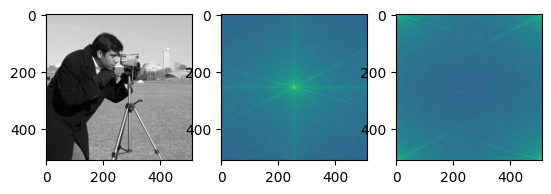

"\npsf_shift_pad = np.fft.fftshift(psf_pad)\n\n# case 1 - convolution with no shift\nimg_convolved_noshift = np.fft.ifft2(np.fft.fft2(img) * np.fft.fft2(psf_pad)).real\n\n# case 2 - convolution with shift\nimg_convolved = np.fft.ifft2(np.fft.fft2(img) * np.fft.fft2(psf_shift_pad)).real\n\nfig=imshow_multi2d([img, img_convolved_noshift, img_convolved], ['img', 'img_convolved_noshift', 'img_convolved'],1,3)\n"

In [2]:
img1 = data.camera()

"""
img1_shift = np.fft.fftshift(img1)
convolution in spatial domain, is the multiplication in frequency domain
before multiplication, need to shift the spatial domain
"""
img2 = np.fft.fft2(img1)
img2_shift = np.fft.fftshift(img2)
# this fftshift is to take care of the negative frequency

plt.subplot(131)
plt.imshow(img1,cmap='gray')
plt.subplot(132)
plt.imshow(20*np.log10(abs(img2_shift)))
plt.subplot(133)
plt.imshow(20*np.log10(abs(img2)))
plt.show()


"""
psf_shift_pad = np.fft.fftshift(psf_pad)

# case 1 - convolution with no shift
img_convolved_noshift = np.fft.ifft2(np.fft.fft2(img) * np.fft.fft2(psf_pad)).real

# case 2 - convolution with shift
img_convolved = np.fft.ifft2(np.fft.fft2(img) * np.fft.fft2(psf_shift_pad)).real

fig=imshow_multi2d([img, img_convolved_noshift, img_convolved], ['img', 'img_convolved_noshift', 'img_convolved'],1,3)
"""


the middle bright spot above is the DC component

below:

gaussian kernel in the spatial domain

is the same shape in the frequency domain

sigma in spatial domain

1/sigma in frequency domain

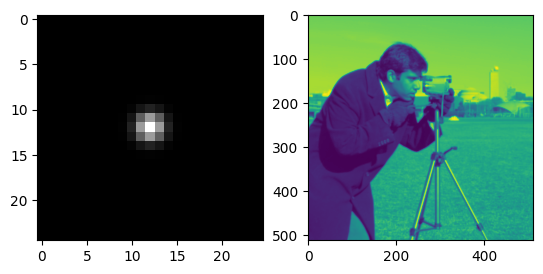

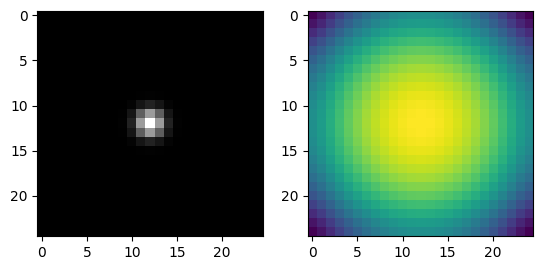

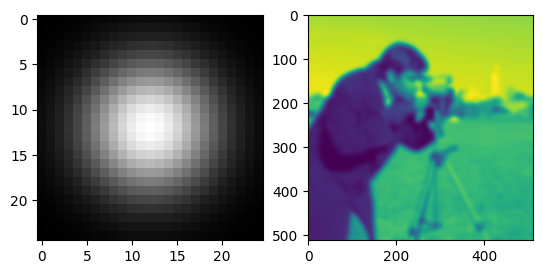

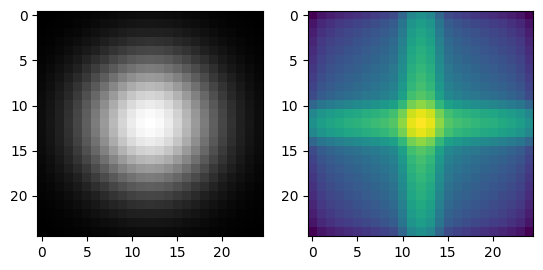

In [3]:
from skimage import filters
gauss = np.zeros((25,25))
gauss[12,12] = 1
gauss_kernel = filters.gaussian(gauss,sigma=1)

plt.subplot(121)
plt.imshow(gauss_kernel,cmap='gray')
plt.subplot(122)
plt.imshow(filters.gaussian(img1,sigma=1))
plt.show()


kernel_fft = np.fft.fft2(gauss_kernel)
kernel_shift = np.fft.fftshift(kernel_fft)
# this fftshift is to take care of the negative frequency

plt.subplot(121)
plt.imshow(gauss_kernel,cmap='gray')
plt.subplot(122)
plt.imshow(20*np.log10(abs(kernel_shift)))

plt.show()

#################################

gauss_5 = np.zeros((25,25))
gauss_5[12,12] = 1
gauss_kernel_5 = filters.gaussian(gauss_5,sigma=5)

plt.subplot(121)
plt.imshow(gauss_kernel_5,cmap='gray')
plt.subplot(122)
plt.imshow(filters.gaussian(img1,sigma=5))
plt.show()


kernel_fft_5 = np.fft.fft2(gauss_kernel_5)
kernel_shift_5 = np.fft.fftshift(kernel_fft_5)
# this fftshift is to take care of the negative frequency

plt.subplot(121)
plt.imshow(gauss_kernel_5,cmap='gray')
plt.subplot(122)
plt.imshow(20*np.log10(abs(kernel_shift_5)))

plt.show()

ignore the artefacts in the bigger sigma in the frequency domain

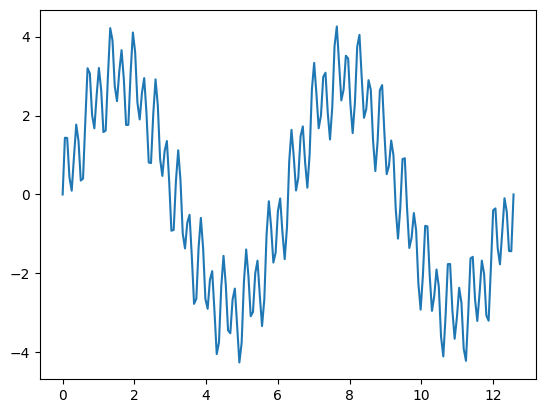

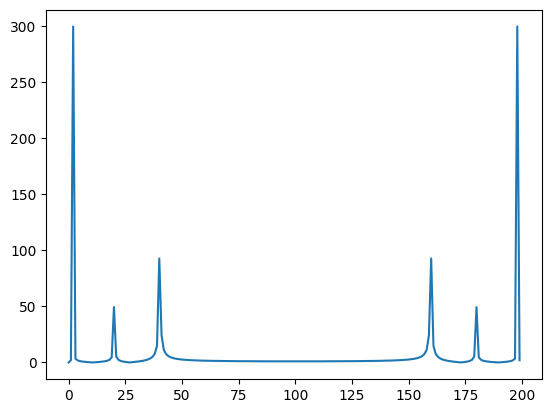

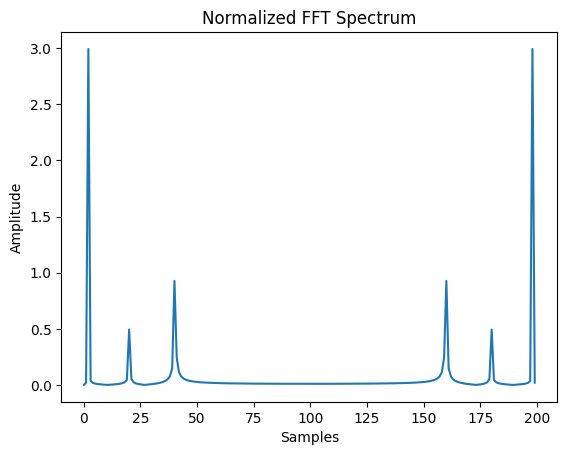

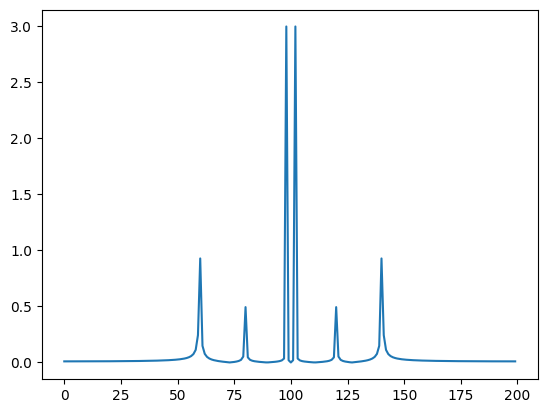

In [ ]:
X = np.linspace(0,4*np.pi,200)

signal_1hz = 3*np.sin(X)

signal_10hz = 0.5*np.sin(10*X)

signal_20hz = np.sin(20*X)

sum = signal_1hz + signal_10hz + signal_20hz

plt.plot(X,sum)

plt.show()


fourier = np.fft.fft(sum) # np.fft.fft2(img) is for 2D img


plt.plot(np.abs(fourier))

plt.show()


N = len(sum) #200 pts

normalize = N/2


plt.plot(np.abs(fourier)/normalize)

plt.ylabel('Amplitude')

plt.xlabel('Samples')

plt.title('Normalized FFT Spectrum')

plt.show()




fshift = np.fft.fftshift(fourier) #only half of 200, has frequency info

plt.plot(np.abs(fshift)/normalize)

plt.show()